<a href="https://colab.research.google.com/github/jtabalon/mobile_price_classification/blob/main/Mobile_Project_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Price Range of Phones Based on features

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
test = pd.read_csv('/test.csv')
train = pd.read_csv('/train.csv')

In [58]:
pd.set_option('display.max_columns', None)

In [59]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [60]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [61]:
len(train)
len(test)

1000

In [62]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [63]:
test.isnull().values.any()

False

In [64]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [65]:
a = train.corr()

In [185]:
a.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998


In [66]:
a.shape

(21, 21)

In [67]:
a.iloc[:,20:21]

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


In [ ]:
y = train['price_range']

In [186]:
y.describe()

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

In [73]:
#3 is the the high price range 1 is the low price range
x_1= train['battery_power']
x_2 = train['fc']
x_3 = train['int_memory']
x_4 = train['mobile_wt']
x_5 = train ['n_cores']
x_6 = train['pc']
x_7 = train['px_height']
x_8 = train['px_width']
x_9 = train['ram']
x_10 = train['sc_h']
x_11 = train['sc_w']
x_12 = train['talk_time']

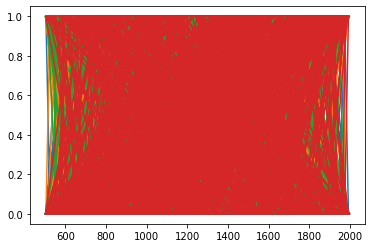

In [74]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_1,y)

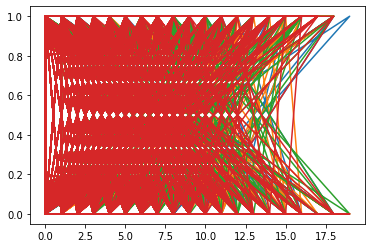

In [75]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_2,y)

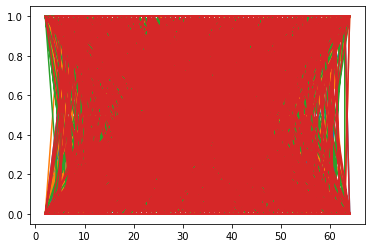

In [76]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_3,y)

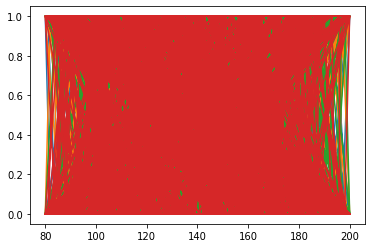

In [77]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_4,y)

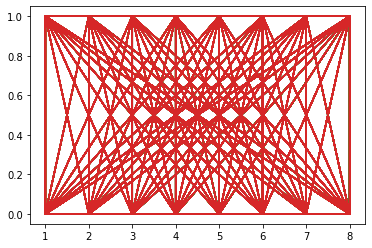

In [78]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_5,y)

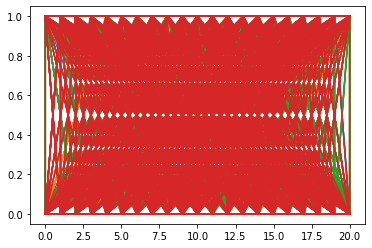

In [79]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_6,y)

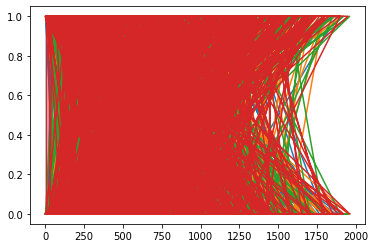

In [80]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_7,y)

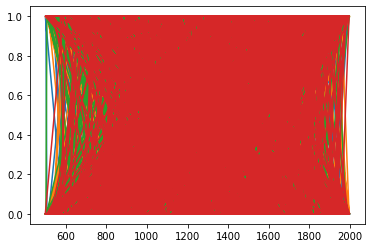

In [81]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_8,y)

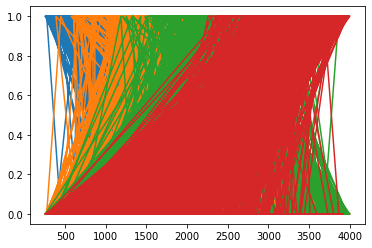

In [82]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_9,y)

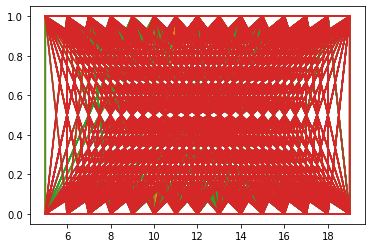

In [83]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_10,y)

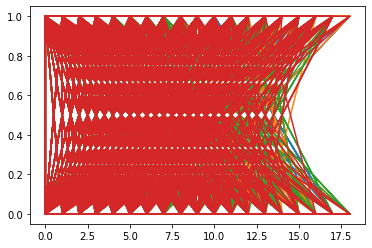

In [84]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_11,y)

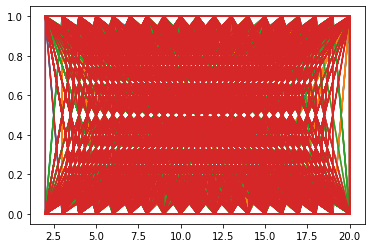

In [85]:
#train.plot(subplots = True, layout = (20,20))
plt.plot(x_12,y)

In [89]:
train = pd.get_dummies(train, columns = ['blue', 'four_g', 'dual_sim','three_g', 'touch_screen', 'wifi', 'n_cores'])

In [90]:
train.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,blue_0,blue_1,four_g_0,four_g_1,dual_sim_0,dual_sim_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1,n_cores_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7,2,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9,2,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11,2,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split

In [174]:
x = train[['battery_power', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'ram', 'blue_0','blue_1','four_g_0','four_g_1','dual_sim_0','dual_sim_1','three_g_0','three_g_1','touch_screen_0','touch_screen_1','wifi_0','wifi_1','n_cores_1','n_cores_2','n_cores_3','n_cores_4','n_cores_5','n_cores_6','n_cores_7','n_cores_8']]
y = train['price_range']

In [175]:
x.head()

,battery_power,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,ram,blue_0,blue_1,four_g_0,four_g_1,dual_sim_0,dual_sim_1,three_g_0,three_g_1,touch_screen_0,touch_screen_1,wifi_0,wifi_1,n_cores_1,n_cores_2,n_cores_3,n_cores_4,n_cores_5,n_cores_6,n_cores_7,n_cores_8
0,842,1,7,0.6,188,2,20,756,2549,9,7,2549,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1021,0,53,0.7,136,6,905,1988,2631,17,3,2631,0,1,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0
2,563,2,41,0.9,145,6,1263,1716,2603,11,2,2603,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0
3,615,0,10,0.8,131,9,1216,1786,2769,16,8,2769,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0
4,1821,13,44,0.6,141,14,1208,1212,1411,8,2,1411,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0


In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 50)

In [177]:
y_train

1153    3
1923    2
696     3
1262    3
1571    3
       ..
1313    2
109     3
1931    1
1504    3
1712    2
Name: price_range, Length: 1400, dtype: int64

In [178]:
from sklearn.ensemble import RandomForestClassifier


In [179]:
regressor = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=75,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=50,
                      max_features='auto')

In [180]:
regressor.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=50, n_estimators=75, n_jobs=-1,
                       oob_score=True, random_state=50)

In [181]:
y_pred = regressor.predict(x_test)

In [182]:
y_pred

array([0, 3, 0, 3, 1, 2, 1, 3, 1, 3, 3, 3, 1, 3, 1, 0, 0, 3, 1, 2, 2, 3,
       2, 3, 0, 2, 2, 0, 1, 0, 3, 1, 1, 3, 0, 1, 1, 0, 3, 0, 2, 1, 2, 2,
       1, 3, 0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 3, 3, 1, 0, 3, 0,
       3, 1, 3, 1, 1, 3, 2, 0, 0, 3, 3, 1, 3, 1, 0, 0, 1, 1, 1, 0, 1, 2,
       3, 3, 1, 3, 0, 1, 3, 3, 1, 0, 2, 1, 1, 3, 3, 2, 0, 1, 1, 1, 3, 0,
       2, 3, 2, 0, 0, 3, 1, 3, 2, 2, 1, 0, 0, 3, 3, 0, 0, 3, 2, 2, 2, 3,
       1, 3, 3, 0, 3, 1, 3, 1, 3, 1, 0, 0, 2, 3, 1, 0, 0, 3, 2, 1, 3, 1,
       0, 2, 3, 3, 2, 0, 1, 2, 3, 3, 3, 0, 3, 1, 3, 1, 1, 0, 3, 1, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 1, 1,
       1, 1, 3, 3, 3, 2, 0, 0, 2, 1, 0, 3, 2, 0, 2, 1, 3, 1, 3, 2, 0, 1,
       3, 0, 2, 3, 3, 3, 2, 1, 3, 0, 0, 2, 2, 1, 0, 0, 3, 1, 0, 0, 1, 3,
       0, 3, 0, 3, 3, 1, 1, 3, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 3, 0, 3, 2,
       0, 2, 1, 2, 3, 3, 0, 0, 3, 2, 3, 3, 0, 1, 1, 2, 3, 3, 0, 3, 1, 1,
       1, 3, 1, 1, 1, 2, 0, 3, 2, 3, 1, 1, 2, 2, 3,

In [183]:
from sklearn import metrics

In [184]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8266666666666667
